<b>Vinicius F. Caridá</b>

<h1 style="text-align:center"> Machine Learning Hands-On </h1>

<h3 class="title"> Links úteis: </h3>
<br>
<ol>
  <li class="item"><a href = "http://scikit-learn.org/stable/"> Sklearn</a>: principal biblioteca de aprendizado de máquina para python.</li>
  <li class="item"><a href = "http://pandas.pydata.org/pandas-docs/stable/"> Pandas</a>: (quase) tudo o que você precisa para trabalhar rapidamente com tabelas</li>
  <li class="item"><a href = "https://docs.scipy.org/doc/numpy/reference/index.html"> Numpy</a>: funções matemáticas estão aqui</li>
  <li class="item"><a href = "https://matplotlib.org/contents.html"> Matplotlib</a>: te ajuda a plotar!</li>
  <li class="item"><a href = "https://seaborn.pydata.org/api.html"> Seaborn</a>: Deixa a matplotlib bonita (contém plots mais bem estruturados)</li>
</ol>

<b>Trabalharemos com as seguintes bases de dados:</b>
- iris.csv
- lenses_final.csv
- car.data
- horse-colic.data
- PETR4.SA.csv
- Boston.csv
- artificial_data

<b>Testem a leitura de um dos arquivos deste curso</b>
- Acessem a documentação da função <i>read_csv</i> do <i>pandas</i>: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [31]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid', {"axes.grid" : False})
sns.set_context('notebook')
np.random.seed(42)

In [32]:
iris            = pd.read_csv("../arquivos/data/iris.csv")
lenses          = pd.read_csv("../arquivos/data/lenses_final.csv")
car             = pd.read_csv("../arquivos/data/cars.csv")
horsecolic      = pd.read_table("../arquivos/data/horse-colic.data")

<h2 style="text-align:center; margin:40px"> Regressão Logística </h2>

![](../arquivos/img/logreg.png)

A <b>regressão logística</b> é um tipo de regressão utilizada no caso de resposta binária. O valor retornado pela regressão logística representa a probabilidade de ocorrer o evento de interesse.

Assim como na regressão linear, queremos encontrar os parâmetros $\beta$ que fazem o modelo melhor se ajustar aos dados. Partimos de uma função linear:

$$ f_{\beta}(x) = \sum_{i = 0}^{N} \beta_ix_i$$

E "encapsulamos" a função linear com uma função (chamada de <b>logística</b> ou <b>sigmoide</b>) que mapeia o espaço dos números reais em um espaço reduzido entre 0 e 1:

$$ \sigma(z) = \frac{1}{1 + e^{-z}}$$

<b>O novo modelo é dado por:</b>

$$ f_{\beta}(x) = \sigma(\sum_{i = 0}^{N} \beta_ix_i) = \frac{1}{1 + e^{-\sum_{i = 0}^{N} \beta_ix_i}}$$

Também substituímos a <b>função de erro</b> por uma função mais adequada para a variável resposta binária:

$$ L(x_i, y_i) = \color{red}{-y_i\log(f_{\beta}(x_i))}\color{blue}{-(1-y_i)\log(1-f_{\beta}(x_i))}$$

E mais uma vez aplicamos o método de gradiente descendente para encontrar o valor ótimo de $\beta$.

<h3> Scikit-Learn </h3>
Agora, vamos rodar os códigos abaixo que usam uma implementação do algoritmo disponível no pacote <i>sklearn</i> (Scikit-Learn). Mas antes vamos dar uma olhada na base que usaremos com os próximos algoritmos de classificação

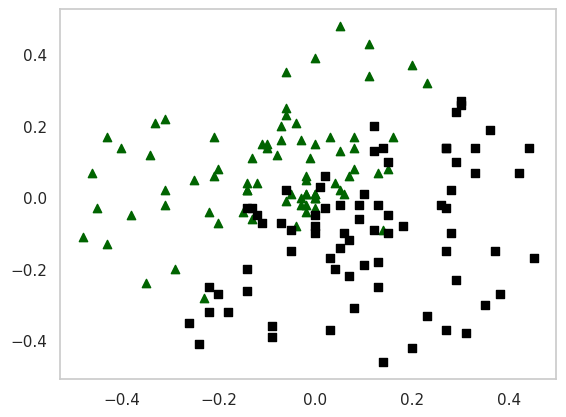

In [33]:
baseDados = pd.read_csv('../arquivos/data/base_regressao_logistica.csv')
plt.scatter(baseDados.X1[baseDados.Y == 0], baseDados.X2[baseDados.Y == 0], c = 'darkgreen', marker = '^')
plt.scatter(baseDados.X1[baseDados.Y == 1], baseDados.X2[baseDados.Y == 1], c = 'black', marker = ',')

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

No regressor logístico do _sklearn_ utilizamos um parâmetro de regularização $ C $.

A fórmula de custo $J(f_{\beta}, y)$ recebe um termo adicional $\frac{1}{C} \sum_{i=1}^{n} \beta_i^2$ (regularização $l_2$).

O parâmetro $ C $ controla quão grandes os coeficientes $ \beta_i $ podem se tornar. Quanto menor o valor de $ C $, mais penalizado o modelo será por utilizar os coeficientes.

In [35]:
LR = LogisticRegression(C = 1)
X = baseDados.loc[:, baseDados.columns != 'Y']
Y = baseDados.Y
LR.fit(X,Y)

LogisticRegression(C=1)

/home/alison/Documents/FIAP/machine_learning/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


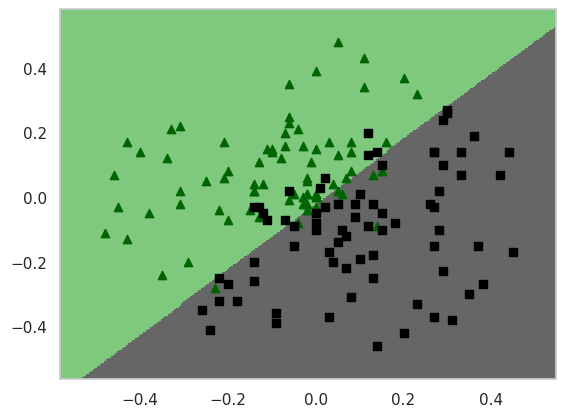

In [36]:
x_min, x_max = baseDados.X1.min() - .1, baseDados.X1.max() + .1
y_min, y_max = baseDados.X2.min() - .1, baseDados.X2.max() + .1
h = .005
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = LR.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Accent)

pred = LR.predict(X)
plt.scatter(baseDados.X1[Y == 0], baseDados.X2[Y == 0], c = 'darkgreen', marker = '^')
plt.scatter(baseDados.X1[Y == 1], baseDados.X2[Y == 1], c = 'black', marker = ',')

Agora iremos treinar um modelo mais complexo. Agora teremos atributos polinomiais, e então, além de ter coeficientes para as variáveis preditivas, também teremos para suas combinações polinomiais, como por exemplo $ x_1^2, x_2^2, x_1x_2, x_1^2x_2, x_1x_2^2, x_1^3, x_2^3 $. Por exemplo, para atributos quadráticos temos $ f_{\beta}(x) = {\beta_0} + {\beta_1}x_1 + {\beta_2}x_1^2 + {\beta_3}x_2 + {\beta_4}x_2^2 + {\beta_5}x_1x_2 $

In [37]:
LR = LogisticRegression(C = 1e10)
grau = 10
X = PolynomialFeatures(degree = grau).fit_transform(baseDados[baseDados.columns[:-1]])
Y = baseDados['Y']
LR.fit(X,Y)

/home/alison/Documents/FIAP/machine_learning/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10000000000.0)

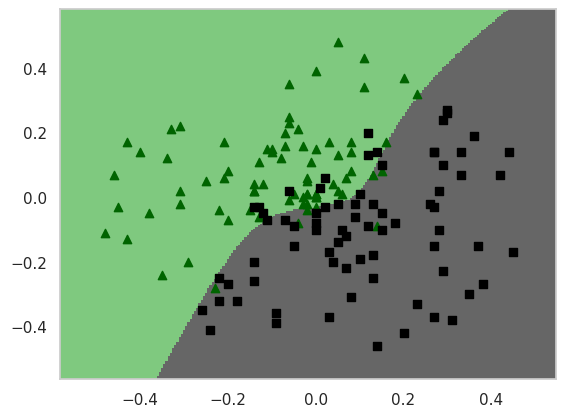

In [38]:
x_min, x_max = baseDados.X1.min() - .1, baseDados.X1.max() + .1
y_min, y_max = baseDados.X2.min() - .1, baseDados.X2.max() + .1
h = .005
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = LR.predict(PolynomialFeatures(degree = grau).fit_transform(np.c_[xx.ravel(),yy.ravel()]))

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Accent)

pred = LR.predict(X)
plt.scatter(baseDados.X1[Y == 0], baseDados.X2[Y == 0], c = 'darkgreen', marker = '^')
plt.scatter(baseDados.X1[Y == 1], baseDados.X2[Y == 1], c = 'black', marker = ',')

Vamos utilizar os mesmos dados empregados no modelo de regressão linear para uma outra tarefa. Classificar o indivíduo nos sexos masculino e feminino dado o seu peso e altura. 

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline
from sklearn.metrics import classification_report

In [40]:
pesos = pd.read_csv('../arquivos/data/weights.csv', sep=';')

Como já fizemos uma análise exploratória de dados no exercício de regressão linear, vamos pular essa parte e seguirmos direto para a remoção dos outliers.

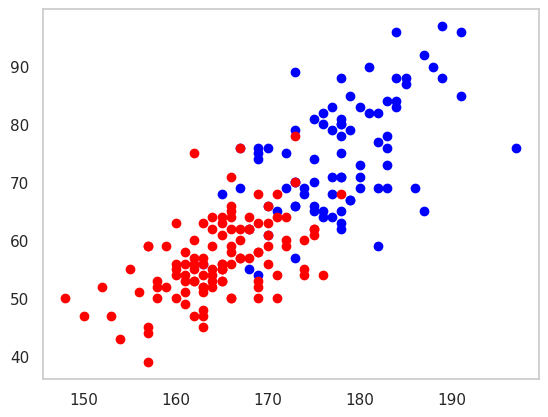

In [41]:
pesos = pesos[pesos.weight <= 100].reset_index(drop=True)
plt.scatter(x=pesos.loc[pesos.sex=='M', 'height'], y=pesos.loc[pesos.sex=='M', 'weight'], c='blue')
plt.scatter(x=pesos.loc[pesos.sex=='F', 'height'], y=pesos.loc[pesos.sex=='F', 'weight'], c='red')

Observe que, apesar de uma leve sobreposição, conseguimos separar os indivídos do sexo masculino com uma reta. O que vamos encontrar com nossa Regressão Logística é a reta que melhor separa esses dados

In [42]:
dummies_sex = pd.get_dummies(pesos.sex, drop_first=True)
pesos = pd.concat([pesos, dummies_sex], axis=1)
pesos.head()

,sex,weight,height,M
0,M,77,182,1
1,F,58,161,0
2,F,53,161,0
3,M,68,177,1
4,F,59,157,0


In [43]:
X = pesos[['weight', 'height']]
y = pesos.M

In [44]:
# X = pesos[['M', 'height']]
# y = pesos.weight

In [45]:
reg_log = LogisticRegression()
reg_log.fit(X, y)

LogisticRegression()

Assim como na regressão linear, podemos observar os coeficientes

In [46]:
reg_log.coef_

array([[0.17641775, 0.28344861]])

In [47]:
reg_log.intercept_

array([-60.13537315])

Isso quer dizer que a equação da nossa função logística é: <br>
    $prob(homem) = \frac{1}{1 + e^{-(peso\times 0.2199 - altura\times 0.0753 - 1.5576)}}$ 

Com esses coeficientes identificamos que a reta que separa indivíduos masculinos de femininos é: <br>
$peso\times 0.2199 - altura\times 0.0753 - 1.5576 = 0$

Podemos visualizar essa reta, para isso devemos escrevê-la em função de $peso$ ou $altura$, já que meu $y$ é fixo em $0$. <br>
Com algumas manipulações algébricas temos a reta em função da $altura$ dada por: <br><br>
    $peso = \frac{-altura\times 0.0753 + 1.5576}{0.2199}$

In [48]:
heights = np.linspace(140, 210, 70)
coef_weight = float(reg_log.coef_[0][0])
coef_height = float(reg_log.coef_[0][1])
intercept = float(reg_log.intercept_)

reta_decisao = (-heights*coef_height - intercept) / coef_weight

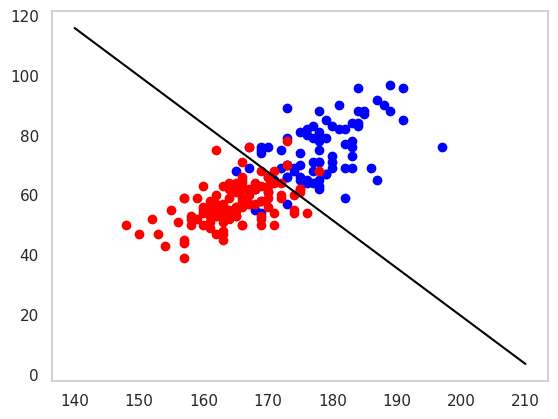

In [49]:
plt.scatter(x=pesos.loc[pesos.sex=='M', 'height'], y=pesos.loc[pesos.sex=='M', 'weight'], c='blue')
plt.scatter(x=pesos.loc[pesos.sex=='F', 'height'], y=pesos.loc[pesos.sex=='F', 'weight'], c='red')
plt.plot(heights, reta_decisao, '-', c='black')
plt.show()

Vamos visualizar os dados classificados conferirmos se foram classificados de acordo com nossa superfície de decisão. Para isso classificamos esses mesmos dados, assim obtemos os rótulos dados durante o treinamento.

In [50]:
classified_reg = reg_log.predict(X)
classified_reg

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1],
      dtype=uint8)

Concatenamos esses dados (na forma de um dataframe), aos dados originais para conseguirmos plotá-los.

In [51]:
pesos_classified_reg = pd.concat([pesos, pd.DataFrame(classified_reg, columns=['classificado_reg'])], axis=1)

In [52]:
#pesos_classified_reg.head(100)

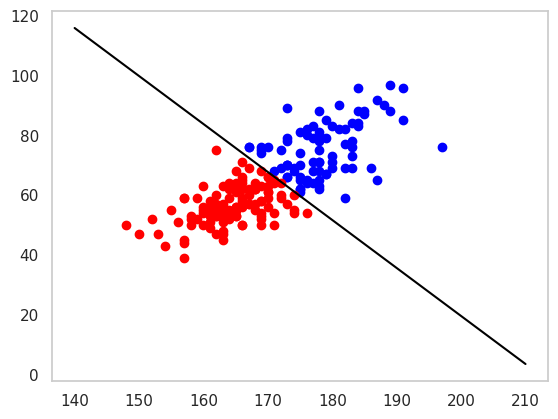

In [53]:
plt.scatter(x=pesos_classified_reg.loc[pesos_classified_reg.classificado_reg==1.0, 'height'], y=pesos_classified_reg.loc[pesos_classified_reg.classificado_reg==1.0, 'weight'], c='blue')
plt.scatter(x=pesos_classified_reg.loc[pesos_classified_reg.classificado_reg==0.0, 'height'], y=pesos_classified_reg.loc[pesos_classified_reg.classificado_reg==0.0, 'weight'], c='red')
plt.plot(heights, reta_decisao, '-', c='black')
plt.show()

Como esperado, os indivíduos "acima" da reta tem valor positivo em relação a ela, logo assumem a classe 1 (masculino). Já os "abaixo", possuem valor negativo e assumem a classe 0

Como o modelo de Regressão Logística é probabilístico, muitas vezes é interessante obtermos a probabilidade de um elemento pertencer à classe determinada. Neste caso usamos o método predict_proba()

In [54]:
novo_exemplo = [[75.00, 173]]

In [55]:
reg_log.predict_proba(novo_exemplo)

/home/alison/Documents/FIAP/machine_learning/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.10597149, 0.89402851]])

In [56]:
a = reg_log.predict(novo_exemplo)
a

/home/alison/Documents/FIAP/machine_learning/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=uint8)

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, classified_reg)
confusion_matrix
print(classification_report(y, classified_reg))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       111
           1       0.90      0.88      0.89        84

    accuracy                           0.91       195
   macro avg       0.91      0.90      0.91       195
weighted avg       0.91      0.91      0.91       195



Portanto, para nosso modelo, uma pessoa de 1,73m e 75Kg, a probabilidade de ser do sexo masculino é 87% e do feminino 13%

In [58]:
X.head()

,weight,height
0,77,182
1,58,161
2,53,161
3,68,177
4,59,157


Em um plano 3D conseguimer ver a sigmoid

In [59]:
from mpl_toolkits.mplot3d import Axes3D

In [60]:
weights = X['weight']

In [61]:
heights = X['height']

In [62]:
probs = pd.DataFrame(reg_log.predict_proba(X)[:,1], columns=['probs'])

In [63]:
pesos_classificados = pd.concat([X, probs], axis=1)

In [64]:
pesos_classificados.head()

,weight,height,probs
0,77,182,0.993545
1,58,161,0.013817
2,53,161,0.005766
3,68,177,0.884059
4,59,157,0.005350


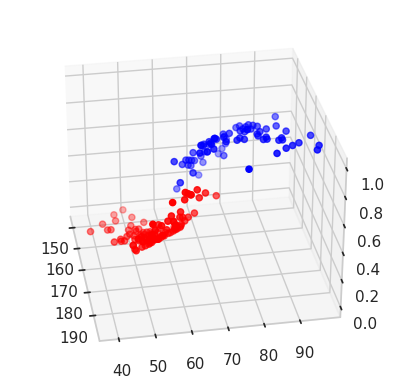

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=pesos_classificados.loc[pesos_classificados.probs >= 0.5, 'height'],
           ys=pesos_classificados.loc[pesos_classificados.probs >= 0.5, 'weight'], 
           zs=pesos_classificados.loc[pesos_classificados.probs >= 0.5, 'probs'],
           c='blue', marker='o')
ax.scatter(xs=pesos_classificados.loc[pesos_classificados.probs < 0.5, 'height'],
           ys=pesos_classificados.loc[pesos_classificados.probs < 0.5, 'weight'], 
           zs=pesos_classificados.loc[pesos_classificados.probs < 0.5, 'probs'],
           c='red', marker='o')
ax.azim = 350 #alterar o valore aqui para rotacionar o grafico


Podemos ver a superfície de decisão

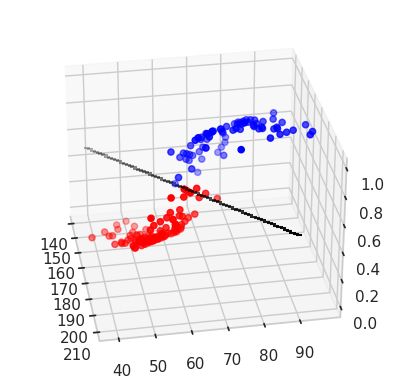

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=pesos_classificados.loc[pesos_classificados.probs >= 0.5, 'height'],
           ys=pesos_classificados.loc[pesos_classificados.probs >= 0.5, 'weight'], 
           zs=pesos_classificados.loc[pesos_classificados.probs >= 0.5, 'probs'],
           c='blue', marker='o')
ax.scatter(xs=pesos_classificados.loc[pesos_classificados.probs < 0.5, 'height'],
           ys=pesos_classificados.loc[pesos_classificados.probs < 0.5, 'weight'], 
           zs=pesos_classificados.loc[pesos_classificados.probs < 0.5, 'probs'],
           c='red', marker='o')
ax.scatter(xs=np.linspace(140, 210, 70),
           ys=np.linspace(40, 90, 70), 
           zs=np.ones(70)*0.5, marker='_', c='black')
ax.azim = 350

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [76]:
# Criando modelos

# regressão logistica
# log_reg = LogisticRegression()

# KNN
KNN = KNeighborsClassifier(n_neighbors = 2)


In [77]:

# treinando modelo
# regressão logistica
# log_reg.fit(X,y)

# treinando modelo
# KNN
KNN.fit(X,y)


KNeighborsClassifier(n_neighbors=2)

In [78]:
# obter predict
# regressão logistica
# y_pred = log_reg.predict(X)

# KNN
y_pred = KNN.predict(X)

In [79]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, y_pred)
confusion_matrix

array([[111,   0],
       [ 13,  71]])

In [80]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.94       111
           1       1.00      0.85      0.92        84

    accuracy                           0.93       195
   macro avg       0.95      0.92      0.93       195
weighted avg       0.94      0.93      0.93       195



In [73]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3)